# Importing Libraries and Dataset

In [80]:
from datetime import datetime
import os
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from scipy import signal
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
pwd

'/home/ajay/Interview.-Machine_Learning'

In [82]:
data =pd.read_excel('/home/ajay/Interview.-Machine_Learning/Training Data.xlsx')

In [83]:
data2=data

# Making Data fit for Neural Network

In [84]:
data2

,Interviewer Name,Interviwer qualification,Interviwer Experience,Interviewer Age,Interviwer Skills,Interviwer Nationality,Interviewer Location,candidate,candidate qualification,candidate Experience,...,candidate Skills,candidate Nationality,candidate Location,Interview Month,Interview time,Mode,Result,1st Year Performance,Failed Candidate Career Progression,Unnamed: 20
0,I1,B.Tech,5,28,"OIC, OCI",US,Atlanta,C1,BS,5,...,"OIC, OCI",US,Atlanta,January,09:00:00,Video,Pass,Outstanding,NaN,NaN
1,I2,BSc,10,35,HCM Cloud,India,Bangalore,C2,B.Tech,8,...,HCM Cloud,India,Bangalore,February,10:00:00,Video,Fail,NaN,Joined superior competition at higher level,NaN
2,I3,MBA,15,45,ERP Cloud,India,Hyderabad,C3,MBA,13,...,ERP Cloud,India,Hyderabad,February,10:00:00,Video,Pass,Meets Expectations,NaN,NaN
3,I4,MCA,5,30,CX Cloud,US,New York,C4,MS,5,...,CX Cloud,US,New York,March,12:00:00,Face to Face,Fail,NaN,Joined inferior competition at the same/lower ...,NaN
4,I5,Bcom,7,32,SCM Cloud,India,Mumbai,C5,B.Tech,6,...,SCM Cloud,India,Mumbai,March,14:00:00,Video,Fail,NaN,Stayed in current company - promoted,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,I16,B.Tech,10,38,"OIC, OCI",US,Atlanta,C496,MS,7,...,"OIC, OCI",US,Atlanta,November,11:00:00,Video,Pass,Outstanding,NaN,NaN
496,I17,BSc,16,51,HCM Cloud,India,Bangalore,C497,MBA,9,...,HCM Cloud,India,Bangalore,December,11:30:00,Video,Fail,NaN,Joined inferior competition at the same/lower ...,NaN
497,I18,MBA,8,30,ERP Cloud,India,Hyderabad,C498,MCA,14,...,ERP Cloud,India,Hyderabad,December,09:00:00,Face to Face,Pass,Outstanding,NaN,NaN
498,I19,MCA,6,27,CX Cloud,US,New York,C499,MS,12,...,CX Cloud,US,New York,December,15:30:00,Face to Face,Fail,NaN,Joined superior competition at the same/lower ...,NaN


In [85]:
data2 = data2.iloc[: , :-1]
data2 = data2.iloc[: , :-1]
data2 = data2.iloc[: , :-1]

In [86]:
column="Interviwer Experience"
data2[column]=data2[column]/data2[column].abs().max()
column="Interviewer Age"
data2[column]=data2[column]/data2[column].abs().max()
column="candidate Experience"
data2[column]=data2[column]/data2[column].abs().max()
column="candidate Age"
data2[column]=data2[column]/data2[column].abs().max()

In [87]:
one_hot = pd.get_dummies(data2['Interviwer Nationality'])
data2 = data2.drop('Interviwer Nationality',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'India': 'Indian Interviewer', 'US': 'American Intervierwer'}, inplace = False)
one_hot = pd.get_dummies(data2['candidate Nationality'])
data2 = data2.drop('candidate Nationality',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'India': 'Indian Candidate', 'US': 'American Candidate'}, inplace = False)
one_hot = pd.get_dummies(data2['Mode'])
data2 = data2.drop('Mode',axis = 1)
data2 = data2.join(one_hot)
data2['Interview Month'].replace({"January": "Q1", "February":"Q1","March":"Q1","April":"Q2","May":"Q2","June":"Q2","July":"Q3","August":"Q3","September":"Q3","October":"Q4","November":"Q4","December":"Q4"}, inplace=True)
one_hot = pd.get_dummies(data2['Interview Month'])
data2 = data2.drop('Interview Month',axis = 1)
data2 = data2.join(one_hot)

In [88]:
data2 = data2.drop('Interviewer Name',axis = 1)
data2 = data2.drop('candidate',axis = 1)
data2 = data2.drop('Interviewer Location',axis = 1)
data2 = data2.drop('candidate Location',axis = 1)

In [89]:
data2['Interviwer  qualification'].replace({"BSc": 0.2, "Bcom": 0.4,"MCA":0.6,'B.Tech':0.8,"MBA":1}, inplace=True)
data2['candidate  qualification'].replace({"BS": 0.2, "MCA": 0.4,"B.Tech":0.6,'MS':0.8,"MBA":1}, inplace=True)

In [90]:
one_hot = pd.get_dummies(data2['Interviwer Skills'])
data2 = data2.drop('Interviwer Skills',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'CX Cloud': 'CX Cloud(I)', 'ERP Cloud': 'ERP Cloud(I)','HCM Cloud':'HCM Cloud(I)','OIC, OCI':'OIC, OCI(I)','SCM Cloud':'SCM Cloud(I)'}, inplace = False)
one_hot = pd.get_dummies(data2['candidate Skills'])
data2 = data2.drop('candidate Skills',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'CX Cloud': 'CX Cloud(C)', 'ERP Cloud': 'ERP Cloud(C)','HCM Cloud':'HCM Cloud(C)','OIC, OCI':'OIC, OCI(C)','SCM Cloud':'SCM Cloud(C)'}, inplace = False)

In [91]:
time_list=data2["Interview time"].tolist()
l=[]
for item in time_list:
    l.append(str(item))
data2['Interview time']=l
data2['Interview time'].replace({'08:00:00':'Morning', '09:00:00':'Morning', '10:00:00':'Morning', '10:30:00':'Morning', '11:00:00':'Morning','11:30:00':'Morning', '12:00:00':'Morning', '12:30:00':'Afternoon', '13:00:00':'Afternoon', '13:30:00':'Afternoon','14:00:00':'Afternoon', '14:30:00':'Afternoon', '15:00:00':'Afternoon', '15:30:00':'Afternoon', '16:00:00':'Afternoon','17:00:00':'Evening', '17:30:00':'Evening', '18:00:00':'Evening', '19:00:00':'Evening', '20:00:00':'Evening','21:00:00':'Evening'}, inplace=True)
one_hot = pd.get_dummies(data2['Interview time'])
data2 = data2.drop('Interview time',axis = 1)
data2 = data2.join(one_hot)

In [92]:
#data2['Result'].replace({"Pass": 1, "Fail":0}, inplace=True)
one_hot = pd.get_dummies(data2['Result'])
data2 = data2.drop('Result',axis = 1)
data2 = data2.join(one_hot)

In [93]:
data2

,Interviwer qualification,Interviwer Experience,Interviewer Age,candidate qualification,candidate Experience,candidate Age,Indian Interviewer,American Intervierwer,Indian Candidate,American Candidate,...,CX Cloud(C),ERP Cloud(C),HCM Cloud(C),"OIC, OCI(C)",SCM Cloud(C),Afternoon,Evening,Morning,Fail,Pass
0,0.8,0.277778,0.549020,0.2,0.357143,0.604651,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
1,0.2,0.555556,0.686275,0.6,0.571429,0.767442,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,1.0,0.833333,0.882353,1.0,0.928571,0.976744,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,0.6,0.277778,0.588235,0.8,0.357143,0.674419,0,1,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0.4,0.388889,0.627451,0.6,0.428571,0.720930,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.8,0.555556,0.745098,0.8,0.500000,0.767442,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
496,0.2,0.888889,1.000000,1.0,0.642857,0.720930,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
497,1.0,0.444444,0.588235,0.4,1.000000,0.813953,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
498,0.6,0.333333,0.529412,0.8,0.857143,0.744186,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Test train Split

In [94]:
#target=data2['Result']
#target=target.to_numpy()
#data2 = data2.drop('Result',axis = 1)
#data2=data2.to_numpy()
target=data2.iloc[:,[29,30]]
data2=data2.drop('Pass',axis=1)
data2=data2.drop('Fail',axis=1)
x_train, x_test, y_train, y_test = train_test_split(data2, target,test_size=0.2, random_state = 42)

# Model Definition 

In [121]:
model= Sequential()
model.add(Dense(128,input_shape=(29,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))

In [122]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.00006)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= optimizer)

In [123]:
model.summary()

score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               3840      
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 130       
Total params: 12,226
Trainable params: 12,226
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 1.1168 - accuracy: 0.5700
Pre-training accuracy: 57.0000

# Training and Evaluation

In [130]:
num_epochs = 1000
num_batch_size = 15
start = datetime.now()

history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs,validation_data=(x_test, y_test),  verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5779 - accuracy: 0.6875 - val_loss: 0.6181 - val_accuracy: 0.6400
Epoch 2/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.6650 - val_loss: 0.6176 - val_accuracy: 0.6400
Epoch 3/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.6750 - val_loss: 0.6171 - val_accuracy: 0.6400
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5565 - accuracy: 0.6825 - val_loss: 0.6175 - val_accuracy: 0.6200
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5785 - accuracy: 0.6875 - val_loss: 0.6175 - val_accuracy: 0.6400
Epoch 6/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.6850 - val_loss: 0.6174 - val_accuracy: 0.6200
Epoch 7/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5721 - accuracy: 0.6825 - val_loss: 0.6171 - val_accuracy: 0.6200
Epoch 

27/27 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.6775 - val_loss: 0.6148 - val_accuracy: 0.6200
Epoch 59/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7100 - val_loss: 0.6148 - val_accuracy: 0.6400
Epoch 60/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.6850 - val_loss: 0.6148 - val_accuracy: 0.6400
Epoch 61/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.6800 - val_loss: 0.6144 - val_accuracy: 0.6300
Epoch 62/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.6875 - val_loss: 0.6140 - val_accuracy: 0.6300
Epoch 63/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6900 - val_loss: 0.6139 - val_accuracy: 0.6300
Epoch 64/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.6900 - val_loss: 0.6139 - val_accuracy: 0.6500
Epoch 65/1000

27/27 [==============================] - 0s 4ms/step - loss: 0.5681 - accuracy: 0.6875 - val_loss: 0.6123 - val_accuracy: 0.6300
Epoch 116/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7050 - val_loss: 0.6124 - val_accuracy: 0.6300
Epoch 117/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7025 - val_loss: 0.6126 - val_accuracy: 0.6300
Epoch 118/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 0.6775 - val_loss: 0.6124 - val_accuracy: 0.6300
Epoch 119/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.6950 - val_loss: 0.6126 - val_accuracy: 0.6300
Epoch 120/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.7050 - val_loss: 0.6127 - val_accuracy: 0.6300
Epoch 121/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.6975 - val_loss: 0.6127 - val_accuracy: 0.6300
Epoch 1

Epoch 172/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5585 - accuracy: 0.6875 - val_loss: 0.6107 - val_accuracy: 0.6300
Epoch 173/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5538 - accuracy: 0.6925 - val_loss: 0.6105 - val_accuracy: 0.6300
Epoch 174/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.6825 - val_loss: 0.6107 - val_accuracy: 0.6300
Epoch 175/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.6900 - val_loss: 0.6107 - val_accuracy: 0.6300
Epoch 176/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.6850 - val_loss: 0.6105 - val_accuracy: 0.6300
Epoch 177/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.6975 - val_loss: 0.6104 - val_accuracy: 0.6300
Epoch 178/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5596 - accuracy: 0.6800 - val_loss: 0.6105 - val_accuracy:

Epoch 229/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5531 - accuracy: 0.6825 - val_loss: 0.6094 - val_accuracy: 0.6300
Epoch 230/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5486 - accuracy: 0.7050 - val_loss: 0.6094 - val_accuracy: 0.6300
Epoch 231/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.6925 - val_loss: 0.6091 - val_accuracy: 0.6300
Epoch 232/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7100 - val_loss: 0.6090 - val_accuracy: 0.6300
Epoch 233/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.6850 - val_loss: 0.6090 - val_accuracy: 0.6300
Epoch 234/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7050 - val_loss: 0.6089 - val_accuracy: 0.6300
Epoch 235/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7050 - val_loss: 0.6089 - val_accuracy:

Epoch 286/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5395 - accuracy: 0.7025 - val_loss: 0.6070 - val_accuracy: 0.6300
Epoch 287/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.6875 - val_loss: 0.6067 - val_accuracy: 0.6300
Epoch 288/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.6800 - val_loss: 0.6070 - val_accuracy: 0.6300
Epoch 289/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5494 - accuracy: 0.7000 - val_loss: 0.6067 - val_accuracy: 0.6300
Epoch 290/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5526 - accuracy: 0.6900 - val_loss: 0.6073 - val_accuracy: 0.6200
Epoch 291/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7000 - val_loss: 0.6068 - val_accuracy: 0.6300
Epoch 292/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7000 - val_loss: 0.6066 - val_accuracy:

Epoch 343/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7100 - val_loss: 0.6053 - val_accuracy: 0.6200
Epoch 344/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.6850 - val_loss: 0.6055 - val_accuracy: 0.6300
Epoch 345/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.6825 - val_loss: 0.6058 - val_accuracy: 0.6200
Epoch 346/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.6900 - val_loss: 0.6056 - val_accuracy: 0.6200
Epoch 347/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.6900 - val_loss: 0.6053 - val_accuracy: 0.6200
Epoch 348/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.6950 - val_loss: 0.6056 - val_accuracy: 0.6200
Epoch 349/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.6925 - val_loss: 0.6057 - val_accuracy:

Epoch 400/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.6900 - val_loss: 0.6043 - val_accuracy: 0.6300
Epoch 401/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7250 - val_loss: 0.6045 - val_accuracy: 0.6300
Epoch 402/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7025 - val_loss: 0.6046 - val_accuracy: 0.6300
Epoch 403/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.6875 - val_loss: 0.6042 - val_accuracy: 0.6200
Epoch 404/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.6975 - val_loss: 0.6038 - val_accuracy: 0.6200
Epoch 405/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5430 - accuracy: 0.6925 - val_loss: 0.6038 - val_accuracy: 0.6200
Epoch 406/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5376 - accuracy: 0.7100 - val_loss: 0.6037 - val_accuracy:

Epoch 457/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.6950 - val_loss: 0.6032 - val_accuracy: 0.6300
Epoch 458/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.6900 - val_loss: 0.6031 - val_accuracy: 0.6300
Epoch 459/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7175 - val_loss: 0.6028 - val_accuracy: 0.6300
Epoch 460/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.6875 - val_loss: 0.6026 - val_accuracy: 0.6300
Epoch 461/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5429 - accuracy: 0.7025 - val_loss: 0.6030 - val_accuracy: 0.6300
Epoch 462/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.6975 - val_loss: 0.6031 - val_accuracy: 0.6200
Epoch 463/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.6975 - val_loss: 0.6031 - val_accuracy:

Epoch 514/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.7100 - val_loss: 0.6026 - val_accuracy: 0.6600
Epoch 515/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7050 - val_loss: 0.6030 - val_accuracy: 0.6600
Epoch 516/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5260 - accuracy: 0.7125 - val_loss: 0.6034 - val_accuracy: 0.6500
Epoch 517/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5354 - accuracy: 0.7125 - val_loss: 0.6029 - val_accuracy: 0.6600
Epoch 518/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.6975 - val_loss: 0.6027 - val_accuracy: 0.6500
Epoch 519/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.6925 - val_loss: 0.6030 - val_accuracy: 0.6600
Epoch 520/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7100 - val_loss: 0.6024 - val_accuracy:

Epoch 571/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7150 - val_loss: 0.6032 - val_accuracy: 0.6500
Epoch 572/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.7150 - val_loss: 0.6029 - val_accuracy: 0.6600
Epoch 573/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7200 - val_loss: 0.6028 - val_accuracy: 0.6500
Epoch 574/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5253 - accuracy: 0.7200 - val_loss: 0.6035 - val_accuracy: 0.6600
Epoch 575/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.7175 - val_loss: 0.6036 - val_accuracy: 0.6600
Epoch 576/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7025 - val_loss: 0.6037 - val_accuracy: 0.6500
Epoch 577/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7125 - val_loss: 0.6038 - val_accuracy:

Epoch 628/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7075 - val_loss: 0.6027 - val_accuracy: 0.6700
Epoch 629/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5324 - accuracy: 0.7225 - val_loss: 0.6034 - val_accuracy: 0.6700
Epoch 630/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7075 - val_loss: 0.6031 - val_accuracy: 0.6700
Epoch 631/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7175 - val_loss: 0.6033 - val_accuracy: 0.6500
Epoch 632/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5231 - accuracy: 0.7175 - val_loss: 0.6030 - val_accuracy: 0.6700
Epoch 633/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7325 - val_loss: 0.6031 - val_accuracy: 0.6500
Epoch 634/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.7325 - val_loss: 0.6031 - val_accuracy:

Epoch 685/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5218 - accuracy: 0.7250 - val_loss: 0.6037 - val_accuracy: 0.6500
Epoch 686/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5169 - accuracy: 0.7275 - val_loss: 0.6037 - val_accuracy: 0.6500
Epoch 687/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.7225 - val_loss: 0.6040 - val_accuracy: 0.6500
Epoch 688/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.7225 - val_loss: 0.6038 - val_accuracy: 0.6500
Epoch 689/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.7225 - val_loss: 0.6039 - val_accuracy: 0.6500
Epoch 690/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.7125 - val_loss: 0.6040 - val_accuracy: 0.6500
Epoch 691/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.6975 - val_loss: 0.6043 - val_accuracy:

Epoch 742/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5150 - accuracy: 0.7225 - val_loss: 0.6033 - val_accuracy: 0.6400
Epoch 743/1000
27/27 [==============================] - 0s 6ms/step - loss: 0.5153 - accuracy: 0.7000 - val_loss: 0.6023 - val_accuracy: 0.6400
Epoch 744/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5241 - accuracy: 0.7225 - val_loss: 0.6020 - val_accuracy: 0.6400
Epoch 745/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5049 - accuracy: 0.7100 - val_loss: 0.6021 - val_accuracy: 0.6400
Epoch 746/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.7075 - val_loss: 0.6019 - val_accuracy: 0.6400
Epoch 747/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7200 - val_loss: 0.6021 - val_accuracy: 0.6400
Epoch 748/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5231 - accuracy: 0.7175 - val_loss: 0.6016 - val_accuracy:

Epoch 799/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5118 - accuracy: 0.7275 - val_loss: 0.6028 - val_accuracy: 0.6500
Epoch 800/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7325 - val_loss: 0.6029 - val_accuracy: 0.6500
Epoch 801/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.7500 - val_loss: 0.6027 - val_accuracy: 0.6500
Epoch 802/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7325 - val_loss: 0.6024 - val_accuracy: 0.6500
Epoch 803/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7175 - val_loss: 0.6020 - val_accuracy: 0.6500
Epoch 804/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.7275 - val_loss: 0.6022 - val_accuracy: 0.6400
Epoch 805/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7175 - val_loss: 0.6025 - val_accuracy:

Epoch 856/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7225 - val_loss: 0.6007 - val_accuracy: 0.6500
Epoch 857/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7100 - val_loss: 0.6006 - val_accuracy: 0.6500
Epoch 858/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7375 - val_loss: 0.6009 - val_accuracy: 0.6500
Epoch 859/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7325 - val_loss: 0.6008 - val_accuracy: 0.6500
Epoch 860/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.7025 - val_loss: 0.6015 - val_accuracy: 0.6500
Epoch 861/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.7200 - val_loss: 0.6016 - val_accuracy: 0.6600
Epoch 862/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7450 - val_loss: 0.6016 - val_accuracy:

Epoch 913/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7200 - val_loss: 0.6005 - val_accuracy: 0.6500
Epoch 914/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5039 - accuracy: 0.7275 - val_loss: 0.6010 - val_accuracy: 0.6500
Epoch 915/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7425 - val_loss: 0.6014 - val_accuracy: 0.6600
Epoch 916/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7050 - val_loss: 0.6018 - val_accuracy: 0.6500
Epoch 917/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7150 - val_loss: 0.6017 - val_accuracy: 0.6500
Epoch 918/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5160 - accuracy: 0.7175 - val_loss: 0.6014 - val_accuracy: 0.6500
Epoch 919/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.7225 - val_loss: 0.6013 - val_accuracy:

Epoch 970/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7400 - val_loss: 0.6010 - val_accuracy: 0.6500
Epoch 971/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7200 - val_loss: 0.6012 - val_accuracy: 0.6500
Epoch 972/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7225 - val_loss: 0.6010 - val_accuracy: 0.6500
Epoch 973/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5148 - accuracy: 0.7200 - val_loss: 0.6013 - val_accuracy: 0.6500
Epoch 974/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.5025 - accuracy: 0.7325 - val_loss: 0.6011 - val_accuracy: 0.6500
Epoch 975/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7250 - val_loss: 0.6016 - val_accuracy: 0.6500
Epoch 976/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.7325 - val_loss: 0.6020 - val_accuracy:

In [131]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.7524999976158142
Testing Accuracy:  0.6499999761581421


# Result Plots

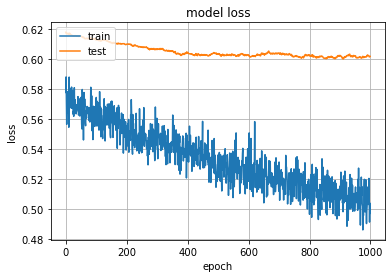

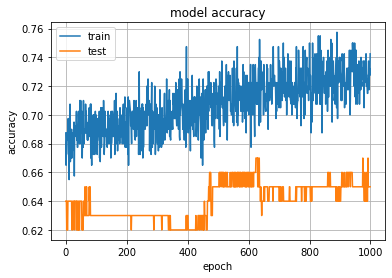

In [132]:
#Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()